In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm

% matplotlib inline

In [29]:
# reading the seismic data
data = pd.read_csv('database.csv', parse_dates= ['Date'], index_col='Date')

In [30]:
# exploring the data
data.head(5)

,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [31]:
data.columns

Index(['Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23412 entries, 1965-01-02 00:00:00 to 2016-12-30 00:00:00
Data columns (total 20 columns):
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Source              

In [ ]:
# how many unique years
data.index.year.unique()

In [ ]:
# figure to quickly take a look at how the magnitude varied with year/date
fig , ax = plt.subplots(figsize=(10,6))
ax.plot(data['Magnitude'], 'o', alpha=0.5, color='r')
ax.set_xlabel('Date')
ax.set_ylabel('Magnitude')
ax.set_ylim(5,10)
plt.grid()

In [ ]:
# histogram showing the magnitude distribution
fig , ax = plt.subplots(figsize=(10,6))
ax.hist(data['Magnitude'], bins=15, color='b', alpha=0.5, )
ax.set_ylabel('Magnitude')
plt.grid()

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.contour(lat,lon, data['Magnitude'])

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
for i in range(0,100):
    plt.clf
    ax.plot(data['Magnitude'][i], 'o', alpha=0.5, color='r')
    ax.set_xlabel('Date')
    ax.set_ylabel('Magnitude')
    ax.set_ylim(5,10)
    plt.grid()
    

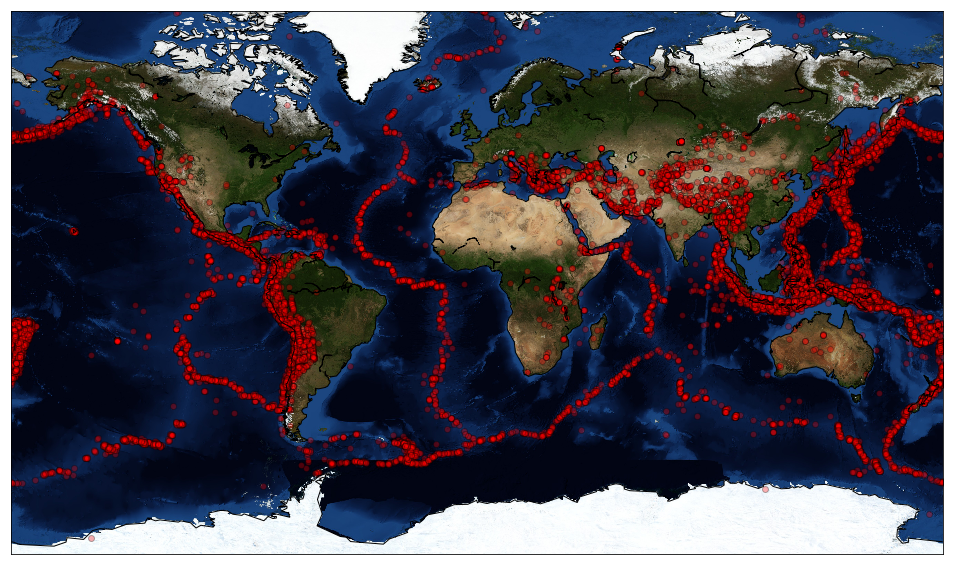

In [49]:
fig = plt.figure(figsize=(20,10))
map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, 
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.etopo()
#map.shadedrelief()
#map.drawcountries()
map.bluemarble()
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
x, y = map(list(data['Longitude']),list(data['Latitude']))
_= map.scatter(x, y, marker='o',color='r', alpha=0.3, edgecolor='k')